## Training ANN on Two Spiral Dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def check_accuracy(predictions, labels):
      pred_class = np.argmax(predictions, 1)
      true_class = np.argmax(labels, 1)
      return (100.0 * np.sum(pred_class == true_class) / predictions.shape[0])

### View the Dataset

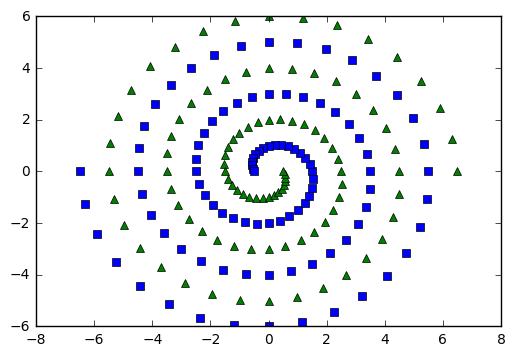

In [2]:
def plot_spirals(x, output, final):
    df = pd.concat([x, output], axis=1)
    if(final):
        x1 = df['x'][df['Class']==0]
        y1 = df['y'][df['Class']==0]
        x2 = df['x'][df['Class']==1]
        y2 = df['y'][df['Class']==1]
    else: 
        x1 = df['x'][df['0']==0]
        y1 = df['y'][df['0']==0]
        x2 = df['x'][df['0']==1]
        y2 = df['y'][df['0']==1]
    plt.plot(x1,y1, 'bs')
    plt.plot(x2,y2, 'g^')
    plt.show()


## import two-spiral data
x = pd.read_csv('TwoSpiralX.csv')
output = pd.read_csv('TwoSpiralY.csv')
plot_spirals(x, output, False)

### Testing & Training Data

In [3]:
x = np.array(x).astype(np.float32)
output = np.array(output).astype(np.float32)
## testing and training sets
size = len(x)
train_size = 164
test_size = 30
all_rows = np.array(list(range(size)))
check = 100
test_accs = list()
counters = list()
while(check != 15): ## make sure test sets are even 
      train_rows = np.random.choice(size, size = train_size, replace=False)
      test_rows = np.array(list(set(all_rows) - set(train_rows)))
      xtrain = x[train_rows,:]
      ytrain = output[train_rows,:]
      xtest = x[test_rows,:]
      ytest = output[test_rows,:]
      check = np.sum((ytest[:,0] == 1))

### ANN Structure & Set-Up

In [4]:
## x and y placeholders 
x_ = tf.placeholder(tf.float32, [train_size, 2])
y_ = tf.placeholder(tf.float32, [train_size, 2])
eta_ = tf.placeholder(tf.float32, [])

## ANN structure 
W1 = tf.Variable(tf.random_uniform([2, 128], minval=-.1, maxval=.1, dtype=np.float32))
b1 = tf.Variable(tf.zeros([1, 128], dtype=np.float32))

W2 = tf.Variable(tf.random_uniform([128, 64], minval=-.1, maxval=.1, dtype=np.float32))
b2 = tf.Variable(tf.zeros([1, 64], dtype=np.float32))

W3 = tf.Variable(tf.random_uniform([64, 32], minval=-.1, maxval=.1, dtype=np.float32))
b3 = tf.Variable(tf.zeros([1, 32], dtype=np.float32))

W4 = tf.Variable(tf.random_uniform([32, 2], minval=-.1, maxval=.1, dtype=np.float32))
b4 = tf.Variable(tf.zeros([2], dtype=np.float32))

y = tf.nn.softmax(tf.matmul(
            (tf.nn.relu(tf.matmul(
               (tf.nn.relu(tf.matmul(
                  (tf.nn.relu(tf.matmul(xtrain, W1) + b1)),
               W2) + b2)), 
            W3) + b3)), 
      W4) + b4)

yt = tf.nn.softmax(tf.matmul(
            (tf.nn.relu(tf.matmul(
               (tf.nn.relu(tf.matmul(
                  (tf.nn.relu(tf.matmul(xtest, W1) + b1)),
               W2) + b2)), 
            W3) + b3)), 
      W4) + b4)

## define loss and optimizer 
eps = .001
eta = .001
cross_entropy = -tf.reduce_sum(y_*tf.log(y + eps))
train = tf.train.GradientDescentOptimizer(eta).minimize(cross_entropy)

### Initialize & Launch Graph

In [5]:
## start session 
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)
CE_prev = 0 

### Train

In [6]:
## train 
for i in range(20000):
      result = sess.run([cross_entropy, train], feed_dict ={x_: xtrain, y_: ytrain, eta_: eta})
      CE = result[0] 
      if i%5000 == 0:
            print("Step: " + str(i))
            train_acc = check_accuracy(y.eval(), ytrain)
            test_acc = check_accuracy(yt.eval(), ytest)
            print('Train accuracy: ' + str(train_acc))
            print('Test accuracy: ' + str(test_acc))
            print('cross entropy : ' + str(CE))
      ## if stuck, decrease learning rate
      if ((CE == CE_prev) & (eta > .0001)):
          eta = eta / 2
      CE_prev = CE

Step: 0
Train accuracy: 53.6585365854
Test accuracy: 43.3333333333
cross entropy : 113.376
Step: 5000
Train accuracy: 92.6829268293
Test accuracy: 66.6666666667
cross entropy : 22.7163
Step: 10000
Train accuracy: 100.0
Test accuracy: 80.0
cross entropy : -0.118493
Step: 15000
Train accuracy: 100.0
Test accuracy: 80.0
cross entropy : -0.145668


### Evaluate



Train accuracy: 100.0
Test accuracy: 80.0


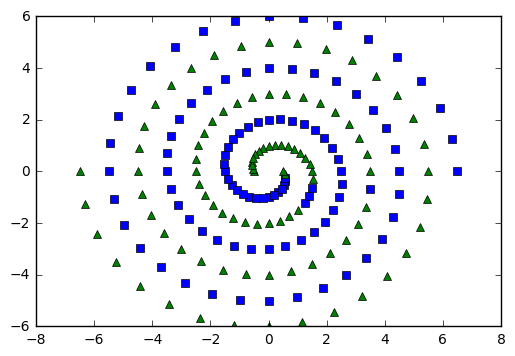

In [7]:
## evaluate model 
train_acc = check_accuracy(y.eval(), ytrain)
test_acc = check_accuracy(yt.eval(), ytest)
print('\n')
print('Train accuracy: ' + str(train_acc))
print('Test accuracy: ' + str(test_acc))

Y_preds = pd.DataFrame(np.argmax(y.eval(),1).tolist() + np.argmax(yt.eval(),1).tolist())
Y_preds.columns = ['Class']
X_concat = pd.DataFrame(np.concatenate((xtrain, xtest)))
X_concat.columns = ['x', 'y']
plot_spirals(X_concat, Y_preds, True)